### **Data Bootcamp Final Project (EDA Portion): Analysis and Predictions on Music Popularity & Streaming Data of the Most Popular Songs**

**Objectives of the project**

1.   Figuring out what factors most to making a 'hit' song
2.   The Evolution of Popular Music
3.   Statistical Analysis on Music Streaming Patterns


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.datasets import make_blobs
from sklearn import set_config
from matplotlib import colormaps
set_config('display')

### Figuring Out what Makes a 'Hit' Song

**Mount Google Drive and Import Kaggle Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install kagglehub

In [4]:
import kagglehub
import os
import zipfile
# Download latest version
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

!kaggle datasets download -d solomonameh/spotify-music-dataset

zip_path = "/content/spotify-music-dataset.zip"

# Extract the zip file to the same directory
extract_path = "/content"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
print("Extracted files:", os.listdir(extract_path))

# Define correct file paths
high_popularity_path = os.path.join(extract_path, "high_popularity_spotify_data.csv")




Dataset URL: https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset
License(s): DbCL-1.0
Extracted files: ['.config', 'spotify-music-dataset.zip', 'low_popularity_spotify_data.csv', 'high_popularity_spotify_data.csv', 'drive', 'sample_data']


In [5]:
df_pop = pd.read_csv(high_popularity_path)
df_pop.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


Check if there are enough rows/columns to satisfy the requirements of this project

In [6]:
df_pop.shape

#enough rows & columns for requirements of this project

(1686, 29)

Check all the column names & see which variables are most relevant

In [7]:
#see the column names of each
print(df_pop.columns)

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')


Initial predictions for popularity: danceability, key, track_artist, playlist_genre

In [8]:
df_pop["track_album_release_date"]

,track_album_release_date
0,2024-08-16
1,2024-05-17
2,2024-10-18
3,2024-08-23
4,2024-10-18
...,...
1681,2022-12-06
1682,2022-07-14
1683,2023-03-30
1684,2022-04-29


See correlation heatmap to get an initial idea of what variables correlate to each other in popular songs

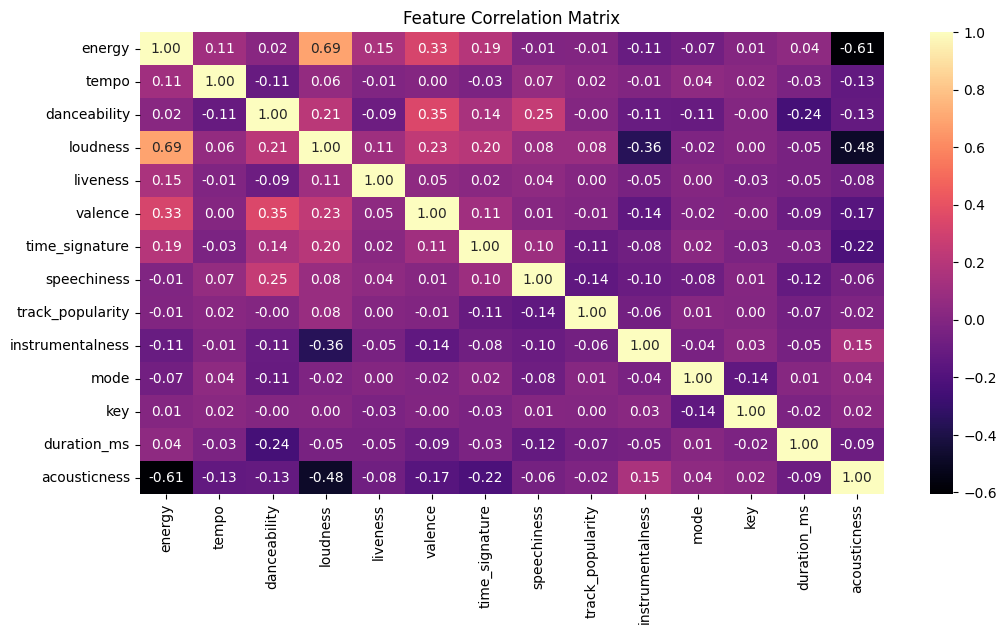

In [9]:
#Visualize Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_pop.corr(numeric_only=True), annot=True, cmap="magma", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

Not too many strong correlations, other than obvious ones like loudness and energy

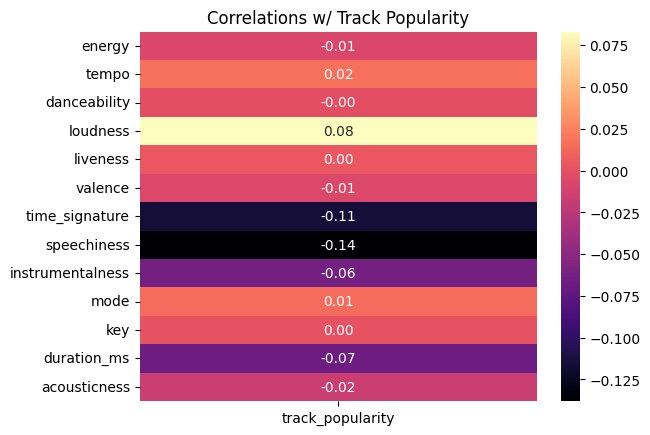

In [10]:
#isoalte track popularity correlation column
popularity_corr = df_pop.corr(numeric_only=True)[["track_popularity"]].drop("track_popularity")
sns.heatmap(popularity_corr, annot=True, cmap="magma", fmt=".2f")
plt.title("Correlations w/ Track Popularity")
plt.show()

**Results**
1. Largest Correlation w/ Track Popularity today is 'loudness'
2. Largest Inverse Correlation w/ popularity is 'speechiness', therefore less wordy songs seem to actually be more popular
3. Additionally, smaller stuff like duration and time signature play a role in inversely correlating with the most popular songs on Spotify currently

Does Genre Affect Popularity?

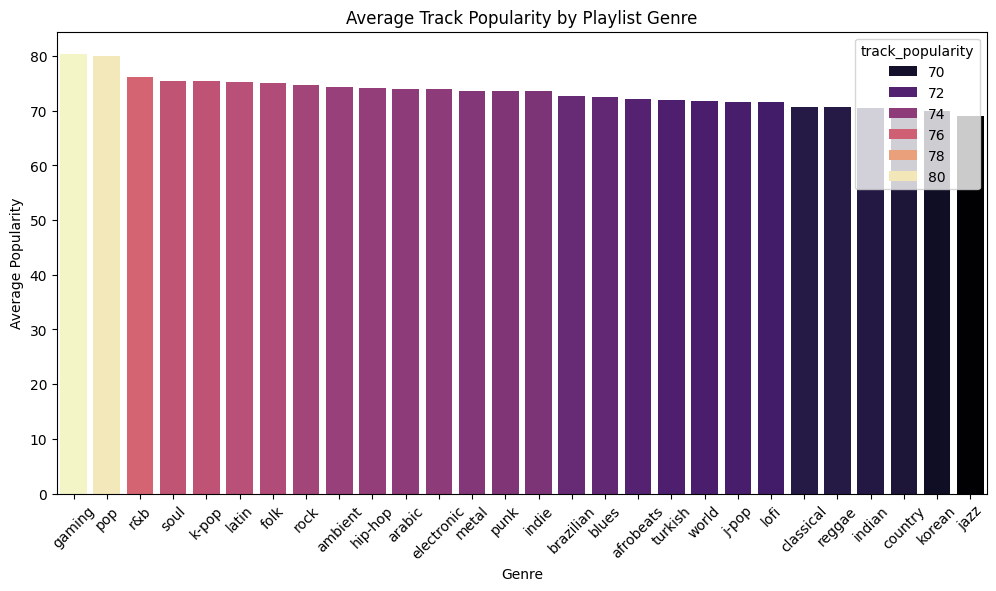

In [11]:
genre_popularity = df_pop.groupby("playlist_genre")["track_popularity"].mean().sort_values(ascending=False)

# Visualizing the results
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette="magma", hue = genre_popularity)
plt.xticks(rotation=45)
plt.title("Average Track Popularity by Playlist Genre")
plt.ylabel("Average Popularity")
plt.xlabel("Genre")
plt.show()

See if SubGenre is actually a better predictor of popularity than genre

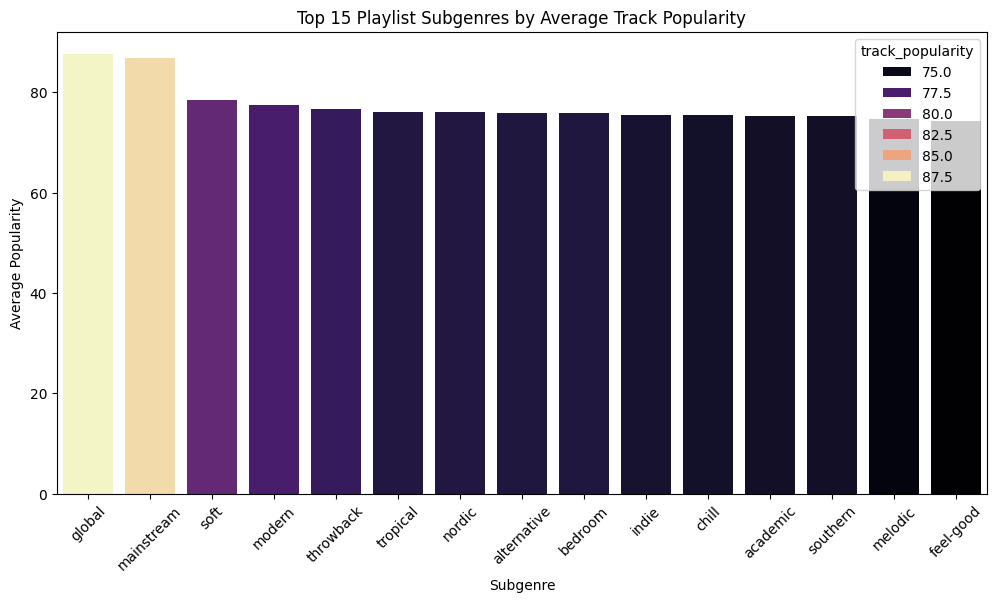

In [12]:
subgenre_popularity = df_pop.groupby("playlist_subgenre")["track_popularity"].mean().sort_values(ascending=False)

# Visualizing the results
plt.figure(figsize=(12, 6))
sns.barplot(x=subgenre_popularity.index[:15], y=subgenre_popularity.values[:15], palette="magma", hue = subgenre_popularity[:15])
plt.xticks(rotation=45)
plt.title("Top 15 Playlist Subgenres by Average Track Popularity")
plt.ylabel("Average Popularity")
plt.xlabel("Subgenre")
plt.show()

See if artists who consistently make music produce more popular songs


AVERAGE track popularity: 75.80604982206405


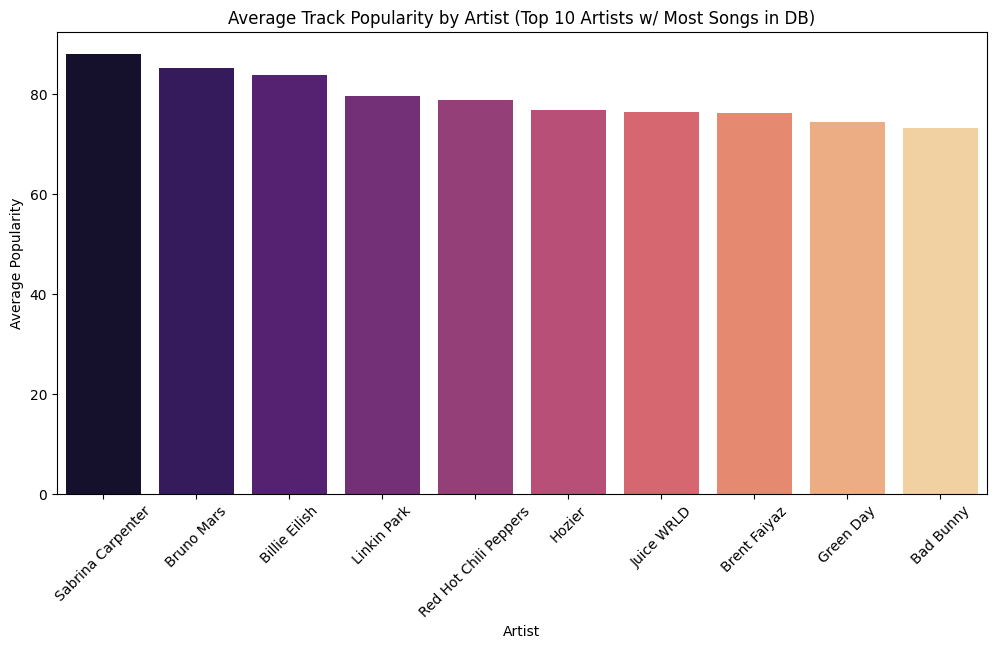

In [13]:
# Find top 10 artists with the most songs in the dataset
top_artists = df_pop["track_artist"].value_counts().nlargest(10).index

# Calculate the average popularity for these artists
artist_popularity = df_pop[df_pop["track_artist"].isin(top_artists)].groupby("track_artist")["track_popularity"].mean().sort_values(ascending=False)


print('AVERAGE track popularity:', df_pop['track_popularity'].mean())
# Visualizing the results
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_popularity.index, y=artist_popularity.values, palette="magma", hue=top_artists, legend = False)
plt.xticks(rotation=45)
plt.title("Average Track Popularity by Artist (Top 10 Artists w/ Most Songs in DB)")
plt.ylabel("Average Popularity")
plt.xlabel("Artist")
plt.show()

**Show 15 most popular artists**

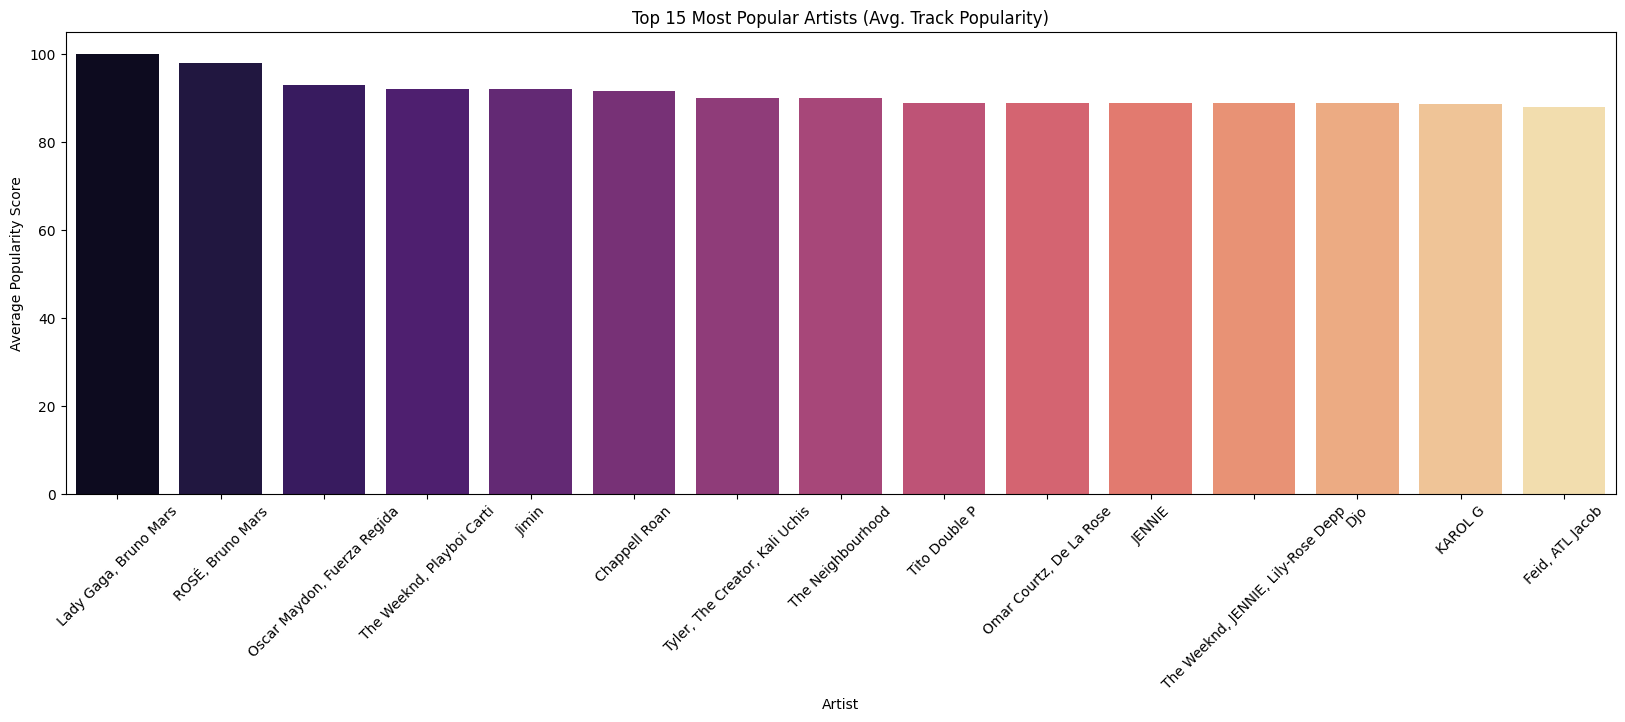

In [14]:
top_popular_artists = df_pop.groupby("track_artist")["track_popularity"].mean().sort_values(ascending=False).head(15)

# Plot Most Popular Artists
plt.figure(figsize=(20, 6))
sns.barplot(x=top_popular_artists.index, y=top_popular_artists.values, palette="magma", hue=top_popular_artists.index)
plt.xticks(rotation=45)
plt.title("Top 15 Most Popular Artists (Avg. Track Popularity)")
plt.ylabel("Average Popularity Score")
plt.xlabel("Artist")
plt.show()

We want to get rid of columns w/ 2 artists in it, since that is not what we are looking for

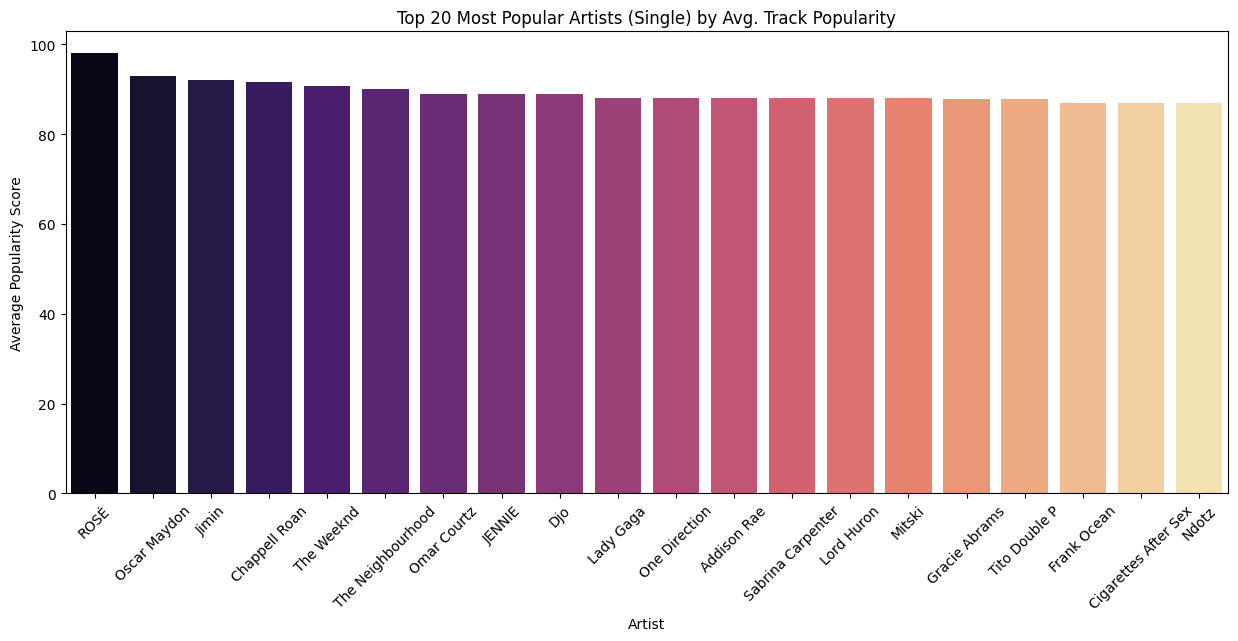

In [15]:
df_pop["primary_artist"] = df_pop["track_artist"].apply(lambda x: x.split(",")[0])

# Compute average popularity per primary artist
top_popular_artists = df_pop.groupby("primary_artist")["track_popularity"].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(15, 6))
sns.barplot(x=top_popular_artists.index, y=top_popular_artists.values, palette="magma", hue=top_popular_artists.index)
plt.xticks(rotation=45)
plt.title("Top 20 Most Popular Artists (Single) by Avg. Track Popularity")
plt.ylabel("Average Popularity Score")
plt.xlabel("Artist")
plt.show()

Make bar graph as a better visualization of correlations/inverse correlations with track popularity



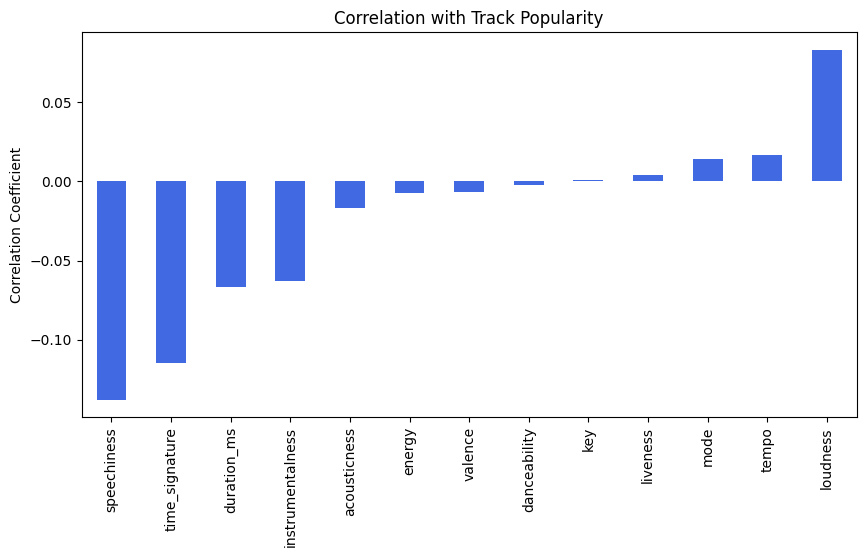

In [16]:

plt.figure(figsize=(10, 5))
#create bar graph for correlations
df_pop.corr(numeric_only=True)["track_popularity"].drop("track_popularity").sort_values().plot(kind='bar', color='royalblue')
plt.title("Correlation with Track Popularity")
plt.ylabel("Correlation Coefficient")
plt.show()

**Part 2. Evaluating how Music Trends has Shifted over the Years**

For this section, I chose 5 variables that I wanted to evaluate more for how it shifted over the past few decades

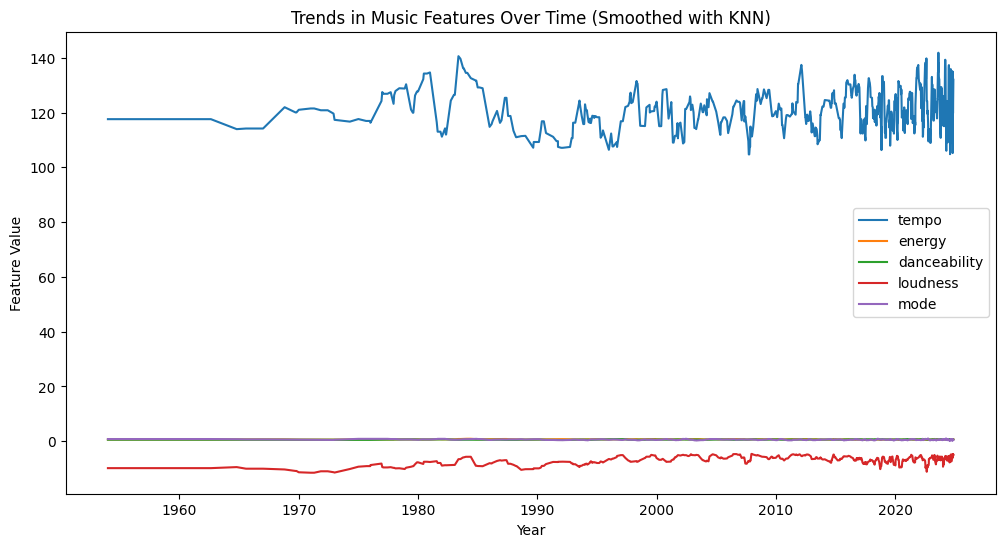

In [17]:
df_pop["track_album_release_date"] = pd.to_datetime(df_pop["track_album_release_date"], format = 'ISO8601')
plt.figure(figsize=(12, 6))

#loop through features
for feature in ["tempo", "energy", "danceability", "loudness", "mode"]:
    df_sorted = df_pop.sort_values("track_album_release_date").dropna(subset=["track_album_release_date", feature])

    #make x time dates in chronological order
    x = df_sorted["track_album_release_date"].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
    y = df_sorted[feature].values

    #initialize and fit model
    knn = KNeighborsRegressor(n_neighbors=15, weights='uniform')
    knn.fit(x, y)
    smoothed_values = knn.predict(x)
    plt.plot(df_sorted["track_album_release_date"], smoothed_values, label=feature)

plt.legend()
plt.title("Trends in Music Features Over Time (Smoothed with KNN)")
plt.xlabel("Year")
plt.ylabel("Feature Value")
plt.show()


Because the feature values are so apart, it makes more sense to do separate graphs for each feature

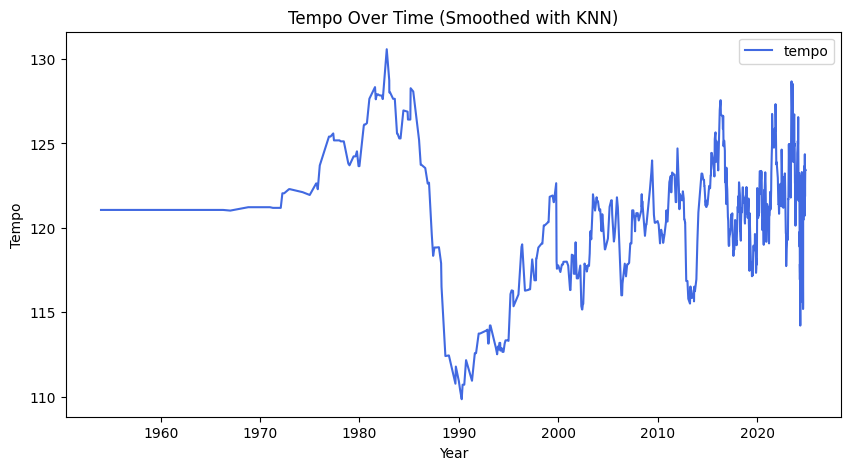

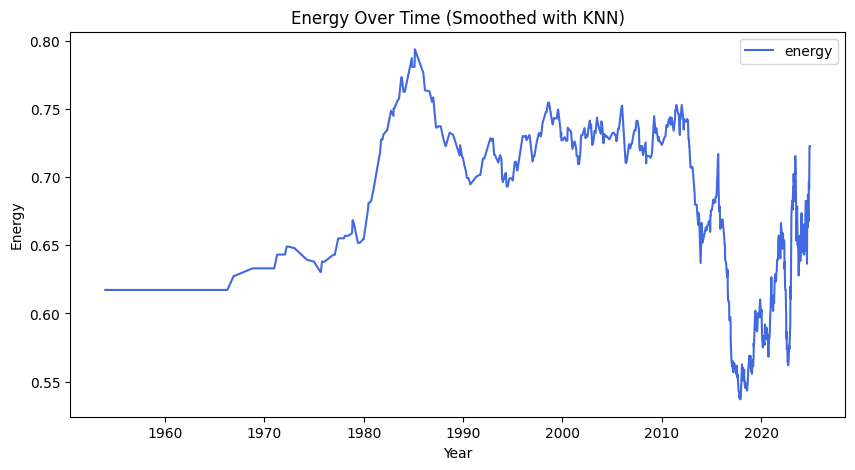

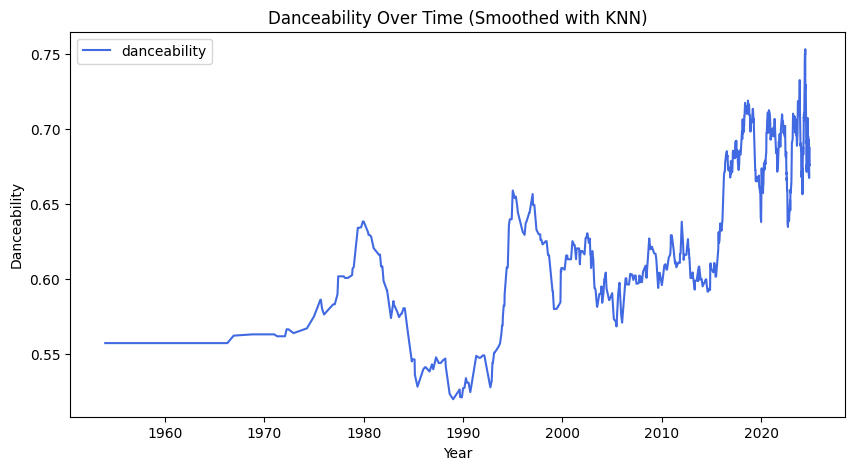

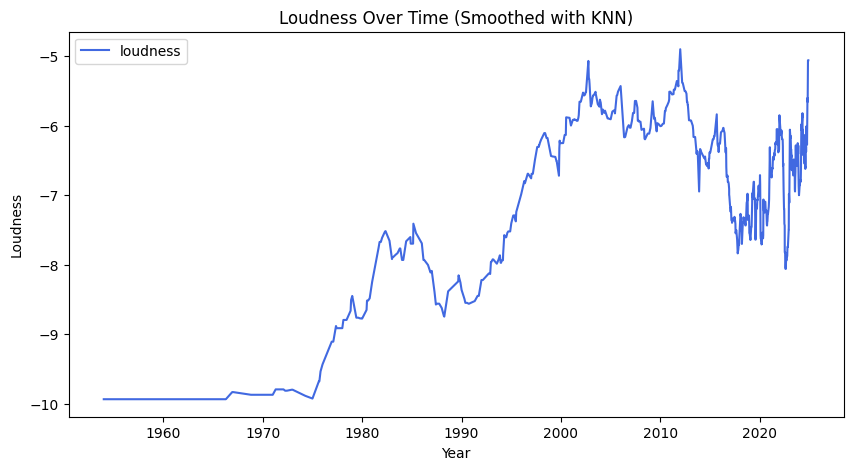

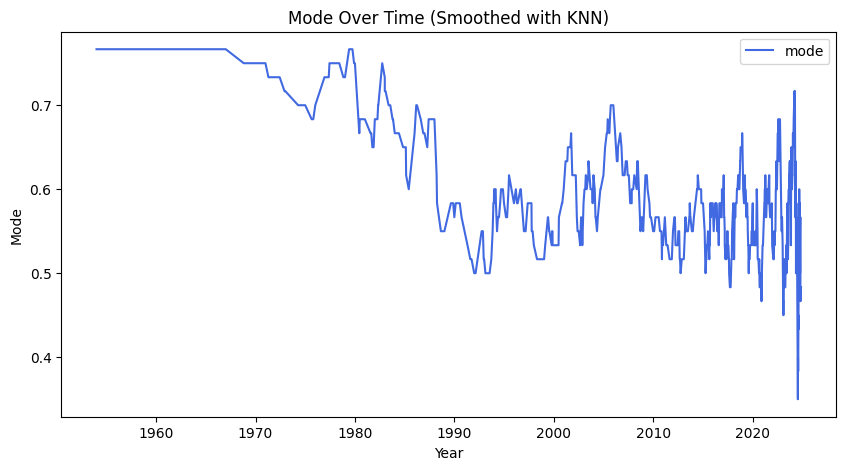

In [18]:
#loop through selected audio features
for feature in ["tempo", "energy", "danceability", "loudness", "mode"]:
    plt.figure(figsize=(10, 5))
    #sort by release date
    df_sorted = df_pop.sort_values("track_album_release_date").dropna(subset=["track_album_release_date", feature])

    x = df_sorted["track_album_release_date"].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
    y = df_sorted[feature].values

    #initialize and fit knn model (60 neighbors)
    knn = KNeighborsRegressor(n_neighbors=60, weights='uniform')
    knn.fit(x, y)
    smoothed_values = knn.predict(x)
    plt.plot(df_sorted["track_album_release_date"], smoothed_values, label=feature, color='royalblue')
    plt.title(f"{feature.capitalize()} Over Time (Smoothed with KNN)")
    plt.xlabel("Year")
    plt.ylabel(feature.capitalize())
    plt.legend()
    plt.show()

**Here we see that there are major trends in music over the last couple decades**

1. Tempo in popular music dropped significantly in the 80s, but made a steady rise ever since the early 90s to the modern day
2. Energy in top songs took a major drop in the 2010s, however, again is making a large comeback in the late 10s/early 20s
3. Since the start of the 90s, danceability has been an increasingly large indicator of popular music
4. Likewise, we see that loudness has also increased alot over time, with major increases in the 90s decade, but dropped a little during the 2010s, with a massive comeback in the 20s.
5. Lastly, mode (I believe 1 meaning major and 0 meaning minor) has seen a massive shift towards minor scales in the last few decades.

**3. Statistical//Modeling Work on Dataset**


Linear and Polynomial Regression Models

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df_pop[["tempo", "danceability", "energy", "loudness"]].values
y = df_pop["track_popularity"].values

# Linear Regression with Cross-Validation
linear_model = LinearRegression()

# 5-fold cross-validation
cv_scores = cross_val_score(linear_model, X, y, cv=5)
print("Linear Regression CV Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Polynomial Regression with Cross-Validation
poly_model = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearRegression())
poly_cv_scores = cross_val_score(poly_model, X, y, cv=5)
print("Polynomial Regression CV Scores:", poly_cv_scores)
print("Average Polynomial CV Score:", poly_cv_scores.mean())

Linear Regression CV Scores: [-0.01290582  0.01973917 -0.33841649 -0.32742642 -0.43085914]
Average CV Score: -0.2179737416694884
Polynomial Regression CV Scores: [-0.0246888   0.0034625  -0.30408848 -0.44568855 -0.81043379]
Average Polynomial CV Score: -0.3162874222758679


KNN Regressor Model

In [20]:
from sklearn.model_selection import train_test_split

# Features for prediction
X = df_pop[["tempo", "danceability", "loudness"]].values
y = df_pop["track_popularity"].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Regressor with Cross-Validation
knn = KNeighborsRegressor(n_neighbors=15)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, error_score='raise')
print("KNN Regressor CV Scores:", cv_scores)
print("Average KNN CV Score:", cv_scores.mean())

KNN Regressor CV Scores: [-0.03815169 -0.04533732 -0.01121533 -0.05481018  0.03744578]
Average KNN CV Score: -0.022413748442328463


Statistical Tests to evaluate Factor Differences between normally and most popular songs

In [21]:
from scipy.stats import ttest_ind

# Split the dataset into MOST popular and normally popular songs (e.g., popularity above median)
popular_songs = df_pop[df_pop["track_popularity"] > df_pop["track_popularity"].median()]
unpopular_songs = df_pop[df_pop["track_popularity"] >= df_pop["track_popularity"].median()]

# Perform t-test for each column variable between popular and unpopular songs
for feature in df_pop.columns:
  if pd.api.types.is_numeric_dtype(df_pop[feature]):
    popular_feature = popular_songs[feature].dropna()
    unpopular_feature = unpopular_songs[feature].dropna()

    t_stat, p_value = ttest_ind(popular_feature, unpopular_feature)
    if abs(t_stat) > 0.95 or abs(p_value) < 0.05:
      print(f"T-test for {feature} between most popular and normally popular songs: t-statistic = {t_stat}, p-value = {p_value}")
      print(feature, "is a significant factor in popularity")

#results: duration is largest factor in popularity, but not statistically significant as p value = 0.34

T-test for track_popularity between most popular and normally popular songs: t-statistic = 3.1021013702743296, p-value = 0.001955022383594058
track_popularity is a significant factor in popularity
T-test for duration_ms between most popular and normally popular songs: t-statistic = -0.9543389050604649, p-value = 0.340055917865956
duration_ms is a significant factor in popularity


**Based on this t test, key is the largest factor that separates the most popular songs from the average popular song**


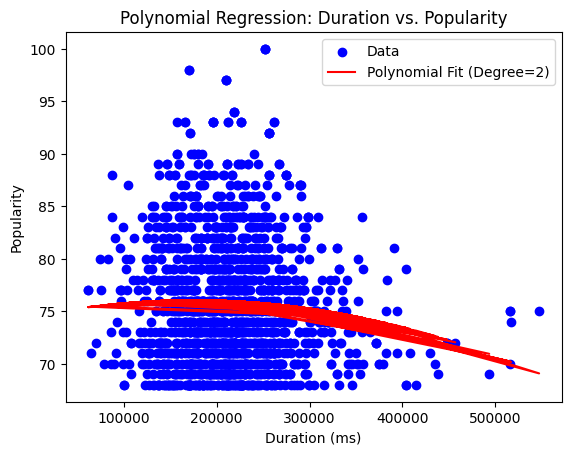

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial regression model for duration and popularity
X = df_pop["duration_ms"].values.reshape(-1, 1)  # Duration as feature
y = df_pop["track_popularity"].values  # Popularity as target

# Apply polynomial features (degree=2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict and plot results
plt.scatter(X, y, color='blue', label="Data")
plt.plot(X, model.predict(X_poly), color='red', label="Polynomial Fit (Degree=2)")
plt.title("Polynomial Regression: Duration vs. Popularity")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.legend()
plt.show()

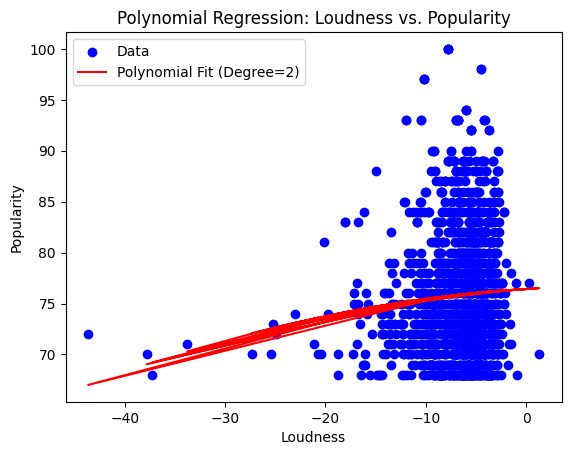

In [23]:
# Polynomial regression model for loudness and popularity
X = df_pop["loudness"].values.reshape(-1, 1)  # Loudness as feature
y = df_pop["track_popularity"].values  # Popularity as target

# Apply polynomial features (degree=2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict and plot results
plt.scatter(X, y, color='blue', label="Data")
plt.plot(X, model.predict(X_poly), color='red', label="Polynomial Fit (Degree=2)")
plt.title("Polynomial Regression: Loudness vs. Popularity")
plt.xlabel("Loudness")
plt.ylabel("Popularity")
plt.legend()
plt.show()

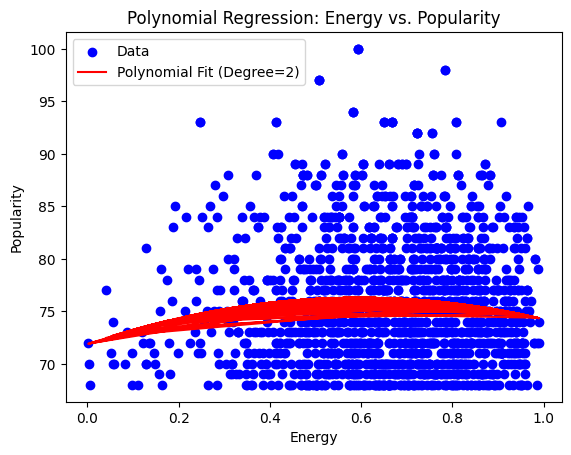

In [24]:
# Polynomial regression model for energy and popularity
X = df_pop["energy"].values.reshape(-1, 1)  # Energy as feature
y = df_pop["track_popularity"].values  # Popularity as target

# Apply polynomial features (degree=2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict and plot results
plt.scatter(X, y, color='blue', label="Data")
plt.plot(X, model.predict(X_poly), color='red', label="Polynomial Fit (Degree=2)")
plt.title("Polynomial Regression: Energy vs. Popularity")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.legend()
plt.show()